In [9]:
import glob

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from utils.constants.constants import Constants

In [ ]:
def get_stable_structure_csv(strucutre):
    files = glob.glob(f'/Users/y1u0d2/desktop/Lab/data/stable-structure/rdf_csv/*')
    file = list(filter(lambda file: strucutre in file, files))
    if len(file) != 1:
        return
    return file[0]

def get_structure_files(structure):
    print(structure)
    dirs = glob.glob(f'/Users/y1u0d2/desktop/Lab/result/lammps/structure-optimization/02/{structure}/*')
    return dirs

def plot_rdf_comparison(df_obs, df_pred, structure, bond_num, bond, save_dir):
    fig, ax = plt.subplots()
    ax.set_title(f'comparison of RDF: {structure} {bond}')
    ax.set_xlabel('r(Å)')
    ax.set_ylabel('g(r)')
    ax.plot(df_pred.distance, df_pred[bond_num], label='pred')
    ax.plot(df_obs.distance, df_obs[bond], label='obs')
    ax.legend()
    fig.savefig(f'{save_dir}/{structure}_{bond}.png')

structures = Constants.structures()
for structure in structures:
    obs_dir = get_stable_structure_csv(structure)
    dirs = get_structure_files(structure)
    for pred_dir in dirs:
        df_pred = pd.read_csv(f'{pred_dir}/rdf.csv')
        df_obs = pd.read_csv(obs_dir)
        plot_rdf_comparison(df_obs, df_pred, structure, '8-8', 'O-O', pred_dir)
        plot_rdf_comparison(df_obs, df_pred, structure, '8-14', 'O-Si', pred_dir)
        plot_rdf_comparison(df_obs, df_pred, structure, '14-14', 'Si-Si', pred_dir)

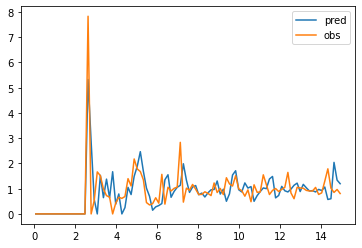

In [7]:
fig, ax = plt.subplots()
ax.plot(df_pred.distance, df_pred['8-8'], label='pred')
ax.plot(df_obs.distance, df_obs['O-O'], label='obs')
ax.legend()